<a href="https://colab.research.google.com/github/lxshit1/sales-analysis/blob/main/project_market_sales__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

project



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

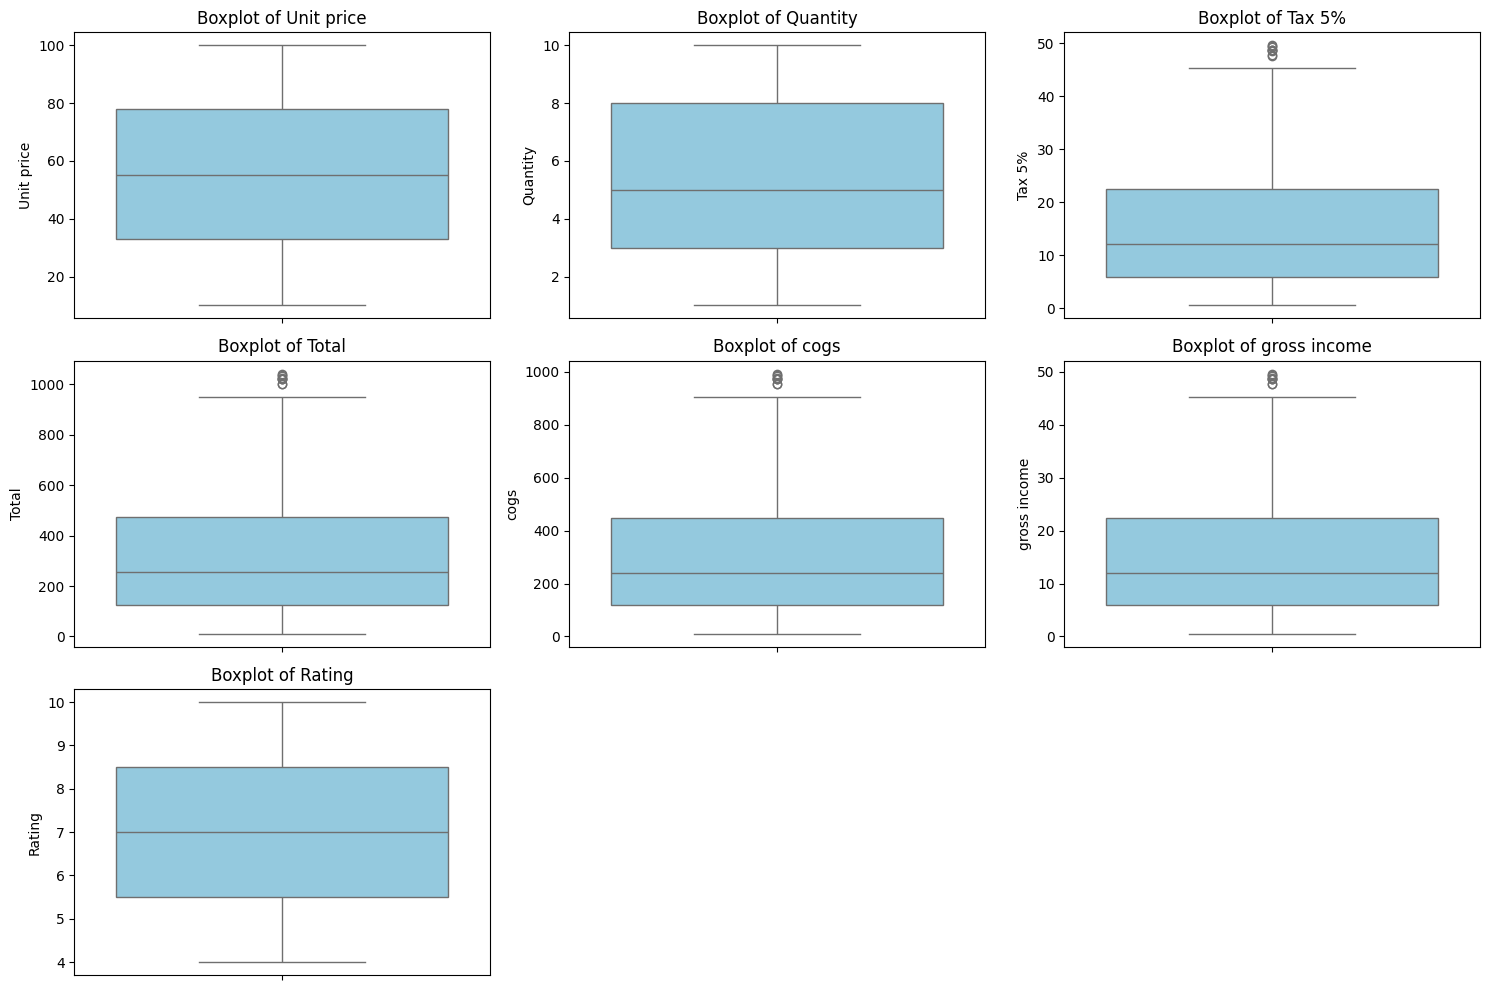

In [ ]:
data = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
unclean_data = data.copy()
# data cleaning
data.describe()
data.info() # date time change
data.isna().sum() # no null values
data.drop_duplicates()

numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
desc_stats = data[numerical_cols].describe()

# Boxplot visualization  - TO DETECT OUTLIERS
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
desc_stats
# Unit price, quantity and rating are free of outliers

def rem_otlr(data,colm):
  q1 = data[colm].quantile(0.25)
  q3 = data[colm].quantile(0.75)
  IQR = q3 - q1
  llimit = q1 - 1.5 * IQR
  ulimit = q3 + 1.5 * IQR
  data = data[(data[colm]>=llimit) & (data[colm]<=ulimit)]
  return data
data = rem_otlr(data,'Tax 5%')
data = rem_otlr(data,'Total')
data = rem_otlr(data,'cogs')
data = rem_otlr(data,'Rating')
data.describe()
# data reduced is less than the 5% of total data (no biasness included)
data.dtypes
data['Date'] = pd.to_datetime(data['Date'],format='mixed')
data['Hours(in 24H)'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

data_before_transform = data.copy()


In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hours(in 24H)'],
      dtype='object')

In [ ]:
data.columns = ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hours(in 24H)']
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()

lencoder = LabelEncoder()
ohencoder = OneHotEncoder()
data['Gender Ecoded'] = lencoder.fit_transform(data['Gender'])
data['Customer type Encoded'] = lencoder.fit_transform(data['Customer type'])
data['Customer type Encoded'] = data['Customer type Encoded'].map({1:0,0:1})

minrate = np.min(data['Rating'])
maxrate = np.max(data['Rating'])
data['normalised_rating'] = ((data['Rating'] - minrate) / (maxrate - minrate))*1.85
minQ = np.min(data['Quantity'])
maxQ = np.max(data['Quantity'])
data['no_product_purchased_norm'] = ((data['Quantity'] - minQ) / (maxQ - minQ))*1.85


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[['no_product_purchased_norm','normalised_rating','Customer type Encoded']])


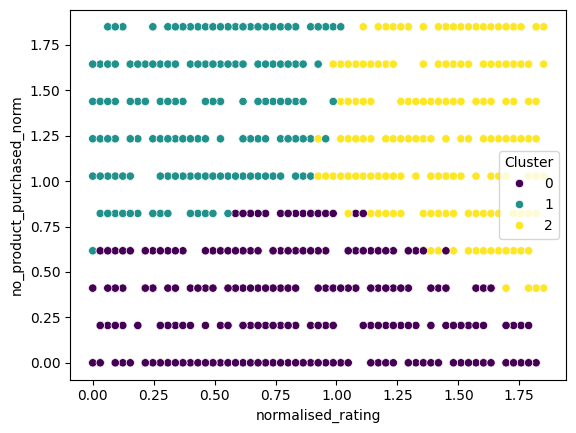

In [ ]:
sns.scatterplot(x='normalised_rating', y='no_product_purchased_norm', hue='Cluster', data=data, palette='viridis')
plt.legend(title='Cluster')

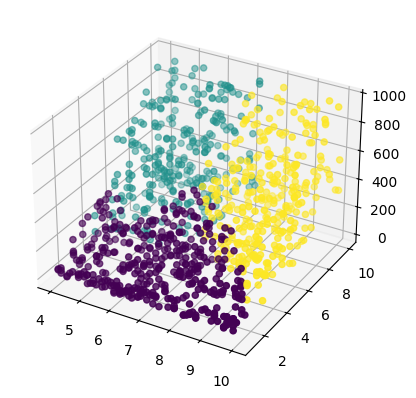

In [ ]:
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Rating'],data['Quantity'], data['Total'],c = data['Cluster'])



In [ ]:
data
data_sorted = data.sort_values(by=['no_product_purchased_norm', 'normalised_rating', 'Customer type Encoded'])
data_sorted.iloc[0:750,:]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross income,Rating,Hours(in 24H),Month,Weekday,Gender Ecoded,Customer type Encoded,normalised_rating,no_product_purchased_norm,Cluster
790,651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,...,2.3205,4.0,20,3,Sunday,1,0,0.000000,0.000000,0
876,885-56-0389,C,Naypyitaw,Member,Male,Fashion accessories,52.35,1,2.6175,54.9675,...,2.6175,4.0,17,2,Tuesday,1,1,0.000000,0.000000,0
998,347-56-2442,A,Yangon,Normal,Female,Home and lifestyle,65.82,1,3.2910,69.1110,...,3.2910,4.1,15,2,Friday,0,0,0.030833,0.000000,0
100,163-56-7055,C,Naypyitaw,Member,Male,Fashion accessories,48.71,1,2.4355,51.1455,...,2.4355,4.1,19,3,Tuesday,1,1,0.030833,0.000000,0
782,307-04-2070,A,Yangon,Member,Female,Fashion accessories,30.62,1,1.5310,32.1510,...,1.5310,4.1,14,2,Tuesday,0,1,0.030833,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,435-13-4908,A,Yangon,Member,Female,Fashion accessories,86.68,8,34.6720,728.1120,...,34.6720,7.2,18,1,Thursday,0,1,0.986667,1.438889,1
124,268-27-6179,B,Mandalay,Member,Female,Fashion accessories,56.47,8,22.5880,474.3480,...,22.5880,7.3,14,3,Saturday,0,1,1.017500,1.438889,2
229,721-86-6247,A,Yangon,Normal,Female,Home and lifestyle,63.42,8,25.3680,532.7280,...,25.3680,7.4,12,3,Monday,0,0,1.048333,1.438889,2
360,612-36-5536,A,Yangon,Member,Male,Food and beverages,80.96,8,32.3840,680.0640,...,32.3840,7.4,11,2,Sunday,1,1,1.048333,1.438889,2


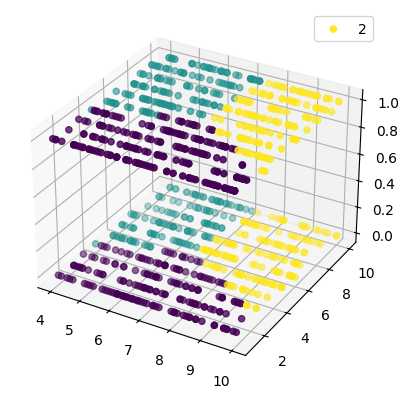

In [ ]:
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Rating'],data['Quantity'], data['Customer type Encoded'],c = data['Cluster'])
ax.legend(data['Cluster'])

* 0 low-engagement worker : purchase less Qty, low total cart value
* 1 moderate-engagement worker : purchase more, less satisfied, high cart value
* 2 high-engagement worker : purchase more Qty, more satisfied[high rating], high cart value





In [ ]:
data['Clutser'] = data['Cluster'].map({1:'Moderate-Engagement-Customers',0:'low-Engagement Customers',2:'Highly Engaged Customers'})
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,Hours(in 24H),Month,Weekday,Gender Ecoded,Customer type Encoded,normalised_rating,no_product_purchased_norm,Cluster,Clutser
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,10,26.1415,748.9715,...,9.1,13,1,Saturday,0,1,1.572500,1.850000,2,Highly Engaged Customers
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,9.6,10,3,Friday,0,0,1.726667,0.822222,2,Highly Engaged Customers
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,7.4,13,3,Sunday,1,0,1.048333,1.233333,2,Highly Engaged Customers
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,8.4,20,1,Sunday,1,1,1.356667,1.438889,2,Highly Engaged Customers
4,373-73-7910,A,Yangon,Normal,Female,Sports and travel,86.31,7,30.2085,634.3785,...,5.3,10,2,Friday,0,0,0.400833,1.233333,1,Moderate-Engagement-Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,...,5.9,11,2,Monday,0,1,0.585833,0.000000,0,low-Engagement Customers
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,6.2,13,1,Tuesday,1,0,0.678333,0.000000,0,low-Engagement Customers
997,727-02-1313,A,Yangon,Member,Female,Food and beverages,31.84,1,1.5920,33.4320,...,7.7,13,2,Saturday,0,1,1.140833,0.000000,0,low-Engagement Customers
998,347-56-2442,A,Yangon,Normal,Female,Home and lifestyle,65.82,1,3.2910,69.1110,...,4.1,15,2,Friday,0,0,0.030833,0.000000,0,low-Engagement Customers


In [ ]:
# product classification - popularity
kmeans = KMeans(n_clusters = 4, random_state=42)
data['products popularity'] = kmeans.fit_predict(data[['no_product_purchased_norm','normalised_rating']])
data['products popularity1'] = data['products popularity'].map({1:'Best Seller',3:'Popular Low-Rated',0:'Hidden Favourate',2:'Low Performer'})

#

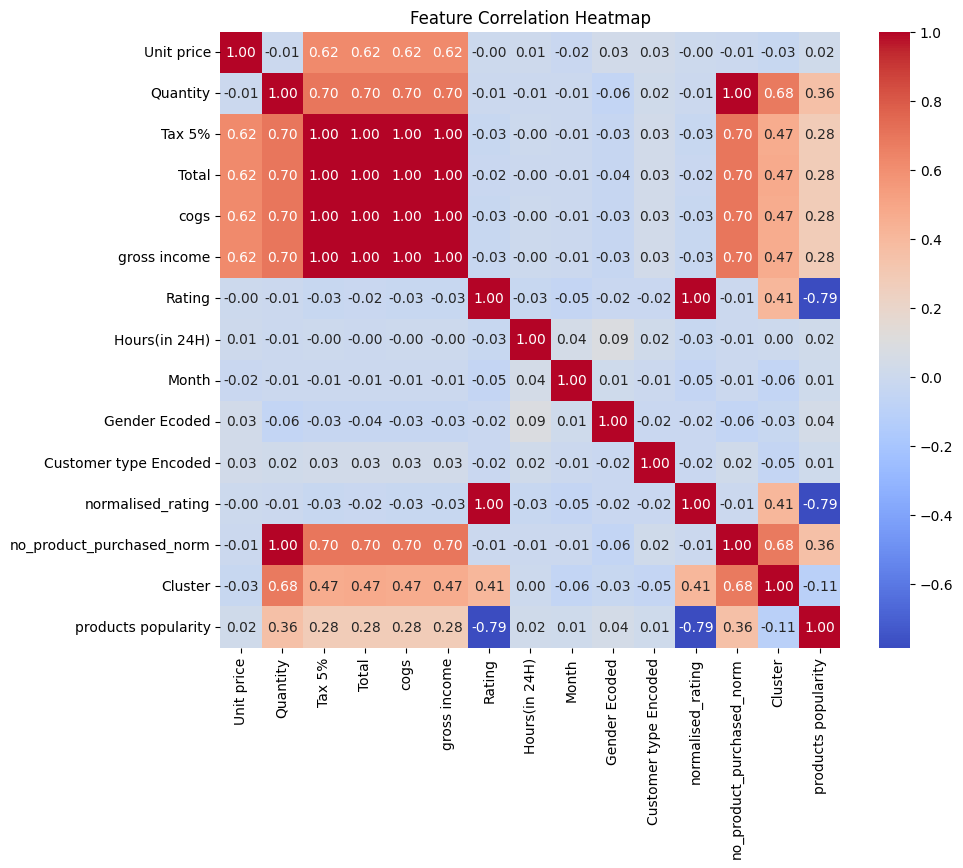

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64','int32'])
new_data = numeric_data[(numeric_data['products popularity'] == 'Popular Low-Rated') | (numeric_data['products popularity'] == 'Low Performer')]
corr_matrix = numeric_data[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross income', 'Rating', 'Hours(in 24H)',
       'Month', 'Gender Ecoded', 'Customer type Encoded', 'normalised_rating',
       'no_product_purchased_norm', 'Cluster', 'products popularity']].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


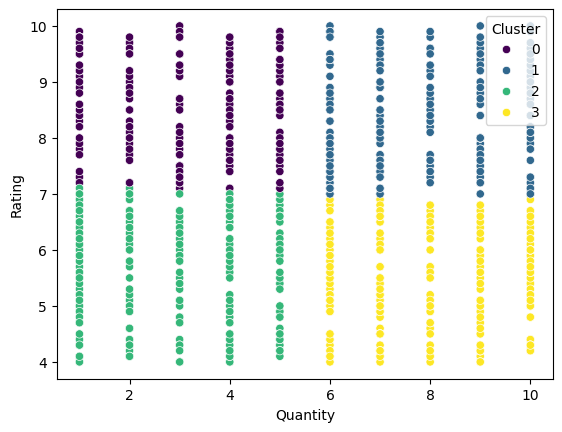

In [ ]:

sns.scatterplot(x='Quantity', y='Rating', hue='products popularity', data=data, palette='viridis')
plt.legend(title='Cluster')

In [ ]:
data.to_csv('modified_supermarket_sales.csv', index=False)
from google.colab import files

files.download('modified_supermarket_sales.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sqlite3  # Replace with your database library
import pandas as pd

# Connect to the database (update the path or credentials as necessary)
connection = sqlite3.connect('supermarket_sales.db')  # Example for SQLite
# SQL Query
query = """
SELECT City, Branch, SUM(Total) AS Total_Sales
FROM sales_data
GROUP BY City, Branch
ORDER BY Total_Sales DESC;
"""

df = pd.read_csv('/content/modified_supermarket_sales.csv')
# Save DataFrame to SQLite table
df.to_sql('sales_data', connection, if_exists='replace', index=False)

df = pd.read_sql_query(query, connection)
df.to_excel('/content/total_sales_by_branch_city.xlsx', index=False)

query2 = """
SELECT Gender, SUM(Total) AS Total_Spend, COUNT(*) AS Number_Transactions
FROM sales_data
GROUP BY Gender;
"""
df2 = pd.read_sql_query(query2, connection)
df2.to_excel('/content/total_sales_by_gender.xlsx', index=False)

query3 = """
SELECT `Customer type`, SUM(Total) AS Total_Spend, COUNT(*) AS Number_Transactions
FROM sales_data
GROUP BY `Customer type`;
"""
df3 = pd.read_sql_query(query3, connection)
df3.to_excel('/content/total_sales_by_CUSTOMER_TYPE.xlsx', index=False)

query4 = """
SELECT Payment, COUNT(*) AS number_payments, AVG(Rating) AS Avg_Rating
FROM sales_data
GROUP BY Payment
"""
df4= pd.read_sql_query(query4, connection)
df4.to_excel('/content/popular_paymentmethods.xlsx', index=False)

query5 = '''
select Weekday, sum(Total) as total_sales, count(*) as total_visits
from sales_data
group by Weekday
'''
df5 = pd.read_sql_query(query5, connection)
df5.to_excel('/content/bestselling_days.xlsx', index=False)

query6 = '''
select `Hours(in 24H)`, sum(Total) as total_sales, count(*) as total_visits
from sales_data
group by `Hours(in 24H)`;
'''
df6 = pd.read_sql_query(query6, connection)
df6.to_excel('/content/bestselling_hours.xlsx', index=False)


In [ ]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hours(in 24H)', 'Month', 'Weekday', 'Gender Ecoded',
       'Customer type Encoded', 'normalised_rating',
       'no_product_purchased_norm', 'Cluster', 'Clutser',
       'products popularity', 'products popularity1'],
      dtype='object')

In [ ]:
len(data[data['Gender'] == 'Female'])

533

In [ ]:
data.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


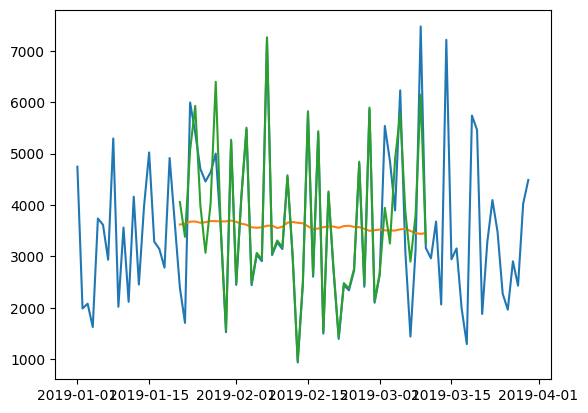

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
daily_sales = data.groupby('Date')['Total'].sum().reset_index()
plt.plot(daily_sales['Date'],daily_sales['Total'])
plt.plot(daily_sales['Date'],trend)
plt.plot(daily_sales['Date'],season+ trend)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(daily_sales['Total'], period = 40)
trend = decompose.trend
season = decompose.seasonal

In [ ]:
daily_sales.columns= ['ds', 'y' ]

the data is pretty-much stationary


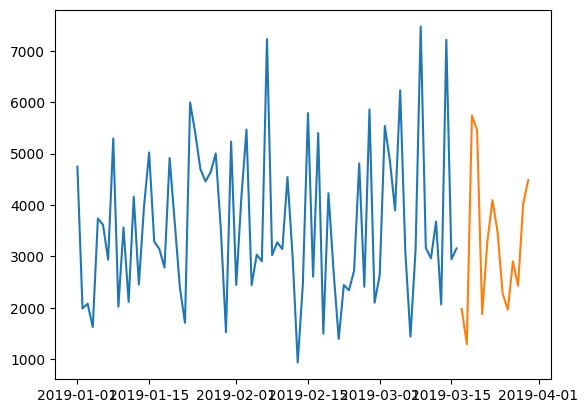

In [ ]:
train_size = int(len(daily_sales)*0.850)
train_data, test_data = daily_sales[:train_size], daily_sales[train_size:]
plt.plot(train_data['ds'],train_data['y'], label = 'train')
plt.plot(test_data['ds'],test_data['y'])

In [ ]:
# Import necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
daily_sales.reset_index()
# Training and testing data
train_size = int(len(daily_sales) * 0.85)
train_data, test_data = daily_sales['y'][:train_size], daily_sales['y'][train_size:]

# Ensure the index is datetime for proper time series modeling

daily_sales,train_data

(           ds          y
 0  2019-01-01  4745.1810
 1  2019-01-02  1985.5030
 2  2019-01-03  2078.1285
 3  2019-01-04  1623.6885
 4  2019-01-05  3736.6835
 ..        ...        ...
 84 2019-03-26  1962.5130
 85 2019-03-27  2902.8195
 86 2019-03-28  2429.4020
 87 2019-03-29  4023.2430
 88 2019-03-30  4487.0595
 
 [89 rows x 2 columns],
 0     4745.1810
 1     1985.5030
 2     2078.1285
 3     1623.6885
 4     3736.6835
         ...    
 70    3677.5515
 71    2063.6070
 72    7214.6340
 73    2942.4150
 74    3154.4730
 Name: y, Length: 75, dtype: float64)

In [ ]:
# Define SARIMAX parameters (Adjust based on your dataset)
p, d, q = 4, 0, 4  # ARIMA orders
P, D, Q, m = 1, 1, 1, 7  # Seasonal orders and period (weekly seasonality)

# Fit the SARIMAX model
model = SARIMAX(train_data,
                order=(p, d, q),
                seasonal_order=(P, D, Q, m),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Print model summary
print(results.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   75
Model:             SARIMAX(4, 0, 4)x(1, 1, [1], 7)   Log Likelihood                -498.855
Date:                             Sun, 23 Mar 2025   AIC                           1019.711
Time:                                     14:27:47   BIC                           1041.989
Sample:                                          0   HQIC                          1028.348
                                              - 75                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0617      3.236      0.328      0.743      -5.280       7.403
ar.L2         -0.6413      

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Test RMSE: 1367.50


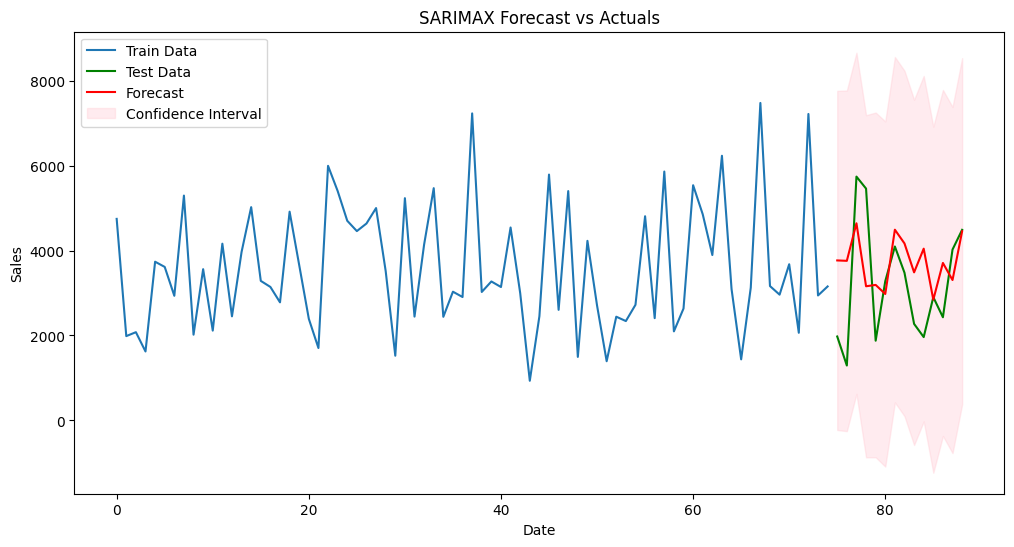

In [ ]:
# Forecast the test data using the trained SARIMAX model
forecast = results.get_forecast(steps=len(test_data))

# Get the predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Evaluate the model performance using RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data, forecast_mean))
print(f"Test RMSE: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label="Train Data")
plt.plot(test_data.index, test_data, label="Test Data", color='green')
plt.plot(test_data.index, forecast_mean, label="Forecast", color='red')
plt.fill_between(test_data.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1],
                 color='pink', alpha=0.3, label="Confidence Interval")
plt.legend()
plt.title("SARIMAX Forecast vs Actuals")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [ ]:
# last index was 88
# for prediction of sales for next 20 days
future_index = np.arange(89,89+15)
future_steps = 15  # Adjust this to the desired number of future days
future_forecast = results.get_forecast(steps=future_steps)
future_mean = future_forecast.predicted_mean
confidence_level = 0.9
future_conf_int = future_forecast.conf_int(alpha=1-confidence_level)
forecast = future_mean.values

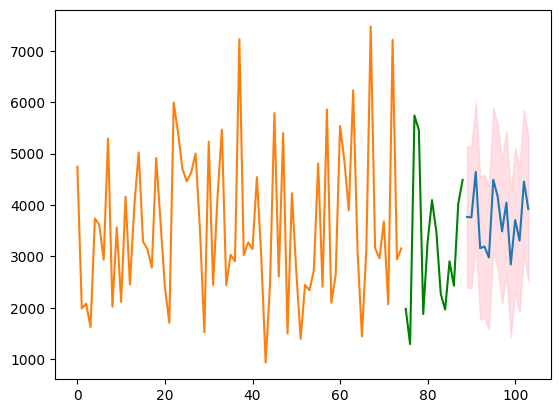

In [ ]:
plt.plot(future_index, forecast)
plt.plot(train_data.index, train_data, label="Train Data")
plt.plot(test_data.index, test_data, label="Test Data", color='green')
plt.fill_between(future_index,
                 future_conf_int.iloc[:, 0],
                 future_conf_int.iloc[:, 1],
                 color='pink', alpha=0.5, label="Confidence Interval")